In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/philhoonoh/spark/blob/main/3_spark_sample_code.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

In [1]:
!pip list | grep pyspark

pyspark             3.3.0


In [2]:
from pyspark.sql import SparkSession

### 1. hdfs 에 파일올리기
```bash
$ hadoop fs -ls
$ hadoop fs -mkdir /user/philhoonoh
$ hadoop fs hadoop fs -put /Users/philhoonoh/Desktop/Hadoop/data.csv /user/philhoonoh/
```

### 2. Spark Session 으로 data.csv를 dataframe 으로 불러오기

In [3]:
spark = SparkSession.builder.getOrCreate()
# spark.stop()

22/08/23 13:53:30 WARN Utils: Your hostname, PHILui-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 172.16.100.49 instead (on interface en0)
22/08/23 13:53:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/23 13:53:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
data = spark.read.csv("hdfs://localhost:9000/user/philhoonoh/data.csv", header="true", inferSchema="true")
data.cache()

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: string, UnitPrice: double, CustomerID: int, Country: string]

In [5]:
data.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
only showing top 5 rows



In [6]:
data.groupby('Country').sum('Quantity').show()

+---------------+-------------+
|        Country|sum(Quantity)|
+---------------+-------------+
|         Sweden|        35637|
|      Singapore|         5234|
|        Germany|       117448|
|         France|       110480|
|         Greece|         1556|
|        Belgium|        23152|
|        Finland|        10666|
|          Italy|         7999|
|           EIRE|       142637|
|      Lithuania|          652|
|         Norway|        19247|
|          Spain|        26824|
|        Denmark|         8188|
|      Hong Kong|         4769|
|        Iceland|         2458|
|         Israel|         4353|
|Channel Islands|         9479|
|         Cyprus|         6317|
|   Saudi Arabia|           75|
|    Switzerland|        30325|
+---------------+-------------+
only showing top 20 rows



### 3. Spark dataframe -> Pandas Dataframe
    - Spark dataframe runs on multiple nodes
    - Pandas dataframe runs on a single machine

In [ ]:
df_pandas = data.toPandas()

In [17]:
df_pandas.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


### 4. Using SQL on pandas dataframe 
    - dataframe 으로 temp view 생성 
    - spark session 에서 sql 문 요청

In [9]:
data.createOrReplaceTempView("data")

In [21]:
spark.sql("SELECT * FROM data WHERE InvoiceNo=536365").collect()

[Row(InvoiceNo='536365', StockCode='85123A', Description='WHITE HANGING HEART T-LIGHT HOLDER', Quantity=6, InvoiceDate='12/1/2010 8:26', UnitPrice=2.55, CustomerID=17850, Country='United Kingdom'),
 Row(InvoiceNo='536365', StockCode='71053', Description='WHITE METAL LANTERN', Quantity=6, InvoiceDate='12/1/2010 8:26', UnitPrice=3.39, CustomerID=17850, Country='United Kingdom'),
 Row(InvoiceNo='536365', StockCode='84406B', Description='CREAM CUPID HEARTS COAT HANGER', Quantity=8, InvoiceDate='12/1/2010 8:26', UnitPrice=2.75, CustomerID=17850, Country='United Kingdom'),
 Row(InvoiceNo='536365', StockCode='84029G', Description='KNITTED UNION FLAG HOT WATER BOTTLE', Quantity=6, InvoiceDate='12/1/2010 8:26', UnitPrice=3.39, CustomerID=17850, Country='United Kingdom'),
 Row(InvoiceNo='536365', StockCode='84029E', Description='RED WOOLLY HOTTIE WHITE HEART.', Quantity=6, InvoiceDate='12/1/2010 8:26', UnitPrice=3.39, CustomerID=17850, Country='United Kingdom'),
 Row(InvoiceNo='536365', StockCod

### 5. Pyspark Dataframe with Plot
    - Plotting PySpark Dataframes using standard python plot libraries like Seaborn require conversion to Pandas...(As far as I know)
    - That being said, python will crash due to massive dataset when using pandas dataframe
    - Thus in order to take advantage of distributing processing, do all the necessary transformations on PySpark Dataframe before transforming it into Pandas Dataframe 
    - As an alternative, Sample PySpark DataFrame before converting to Pandas
    
```python
# data.sample(withReplacement, fraction, seed = None)
sample_data = data.sample(True, 0.5, 42)
pandas_df = sample_data.toPandas()
```

In [31]:
result_data = data.groupby('Country').sum('Quantity')

In [32]:
result_data

DataFrame[Country: string, sum(Quantity): bigint]

In [33]:
pandas_data = result_data.toPandas()

In [35]:
pandas_data.head()

,Country,sum(Quantity)
0,Sweden,35637
1,Singapore,5234
2,Germany,117448
3,France,110480
4,Greece,1556


<AxesSubplot:xlabel='Country', ylabel='sum(Quantity)'>

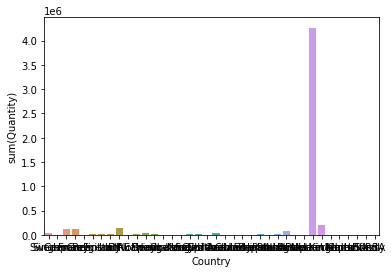

In [38]:
sns.barplot(x = pandas_data['Country'], y = pandas_data['sum(Quantity)'])

In [39]:
spark.stop()